In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

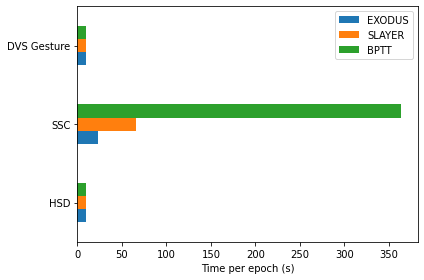

In [2]:
index = ['HSD', 'SSC', 'DVS Gesture']    

bptt = [10, 6*60+4, 10]

slayer = [10, 60+6, 10]

exodus = [10, 23, 10]


df = pd.DataFrame({'EXODUS': exodus,
                   'SLAYER': slayer,
                   'BPTT': bptt,
                   }, index=index)

ax = df.plot.barh()
ax.set_xlabel("Time per epoch (s)")
plt.tight_layout()
plt.savefig("comp_time_comparison.svg")

In [3]:
directories = {
    "SSC": "../ssc",
    "DVS Gesture": "../dvs_gesture",
    "HSD": "../hsd",
}

collected_frames = dict()
for dataset, path in directories.items():
    df = pd.read_csv(Path(path) / "times.csv", header=0, index_col=0)
    collected_frames[dataset] = pd.concat(
        [
            pd.DataFrame({"algorithm": c, "time": df[c], "Dataset": dataset})
            for c in df.columns
        ],
        ignore_index=True
    )

times = pd.concat(collected_frames.values(), ignore_index=True)

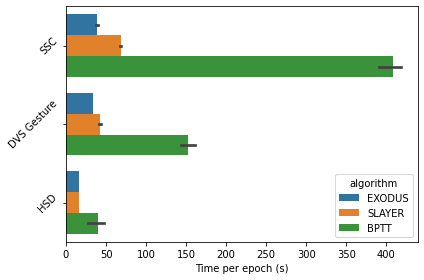

In [4]:
# sns.set(font_scale=1.5, style="white")
plot = sns.barplot(data=times, x="time", y="Dataset", hue="algorithm")
plot.set_xlabel("Time per epoch (s)")
plot.axes.yaxis.label.set_visible(False)
plot.axes.set_yticklabels(plot.axes.get_yticklabels(), rotation=45, va="center")
plt.tight_layout()
plt.savefig("comp_time_comparison.svg")

SSC
	BPTT: 408.29 +- 14.91
	SLAYER: 68.16 +- 0.20
		 5.99 +- 0.22 times faster
	EXODUS: 38.27 +- 1.05
		 10.67 +- 0.49 times faster
DVS Gesture
	BPTT: 152.10 +- 15.02
	SLAYER: 42.51 +- 1.77
		 3.58 +- 0.38 times faster
	EXODUS: 33.40 +- 0.58
		 4.55 +- 0.46 times faster
HSD
	BPTT: 40.36 +- 11.43
	SLAYER: 16.08 +- 0.18
		 2.51 +- 0.71 times faster
	EXODUS: 15.73 +- 0.08
		 2.57 +- 0.73 times faster


/tmp/ipykernel_8295/3380145669.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)
/tmp/ipykernel_8295/3380145669.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)
/tmp/ipykernel_8295/3380145669.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)


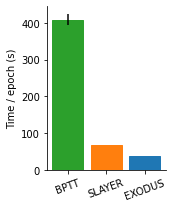

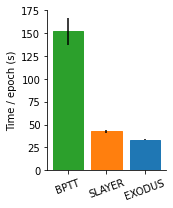

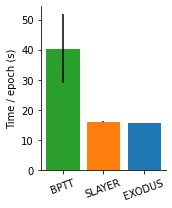

In [11]:
for dataset, df in collected_frames.items():
    print(dataset)
    grouped = df.groupby(["algorithm"])
    means = grouped.mean() # .reset_index()
    stds = grouped.std()
    fig = plt.figure(figsize=(2.5, 3))
    x = ['BPTT', 'SLAYER', 'EXODUS']
    y = [means.loc[method]["time"] for method in x]
    s = [stds.loc[method]["time"] for method in x]
    b = np.array(y[1:])
    db = np.array(s[1:])
    ratios = y[0] / b
    s_ratios = np.sqrt(s[0]**2 / b**2 + y[0]**2 * db**2 / b**4)
    print(f"\tBPTT: {y[0]:.2f} +- {s[0]:.2f}")
    print(f"\tSLAYER: {y[1]:.2f} +- {s[1]:.2f}")
    print(f"\t\t {ratios[0]:.2f} +- {s_ratios[0]:.2f} times faster")
    print(f"\tEXODUS: {y[2]:.2f} +- {s[2]:.2f}")
    print(f"\t\t {ratios[1]:.2f} +- {s_ratios[1]:.2f} times faster")
    barlist=plt.bar(x, y, yerr=s) #, width=1)
    barlist[0].set_color('C2')
    barlist[1].set_color('C1')
    barlist[2].set_color('C0')
    ax = fig.get_axes()[0]
    ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)
    ax.set_ylabel("Time / epoch (s)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig(f"time_{dataset}.svg")
    
    

In [6]:
df = collected_frames["SSC"]
grouped = df.groupby(["algorithm"])
means = grouped.mean() # .reset_index()
stds = grouped.std().reset_index()
x = ['BPTT', 'SLAYER', 'EXODUS']
y = [means.loc[method]["time"] for method in x]

In [7]:
y

[408.28555425008136, 68.16146349906921, 38.26958624521891]

In [10]:
df.groupby("algorithm").mean()

,time
algorithm,
BPTT,408.285554
EXODUS,38.269586
SLAYER,68.161463


In [9]:
y

[408.28555425008136, 68.16146349906921, 38.26958624521891]